<a href="https://colab.research.google.com/github/Seshasai14/DataScience-TuteDude/blob/Neural-Network/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epochs: 1 acc: 58.64027256749953
Epochs: 2 acc: 64.57161297722125
Epochs: 3 acc: 69.42468038488158
Epochs: 4 acc: 72.92201397889535
Epochs: 5 acc: 75.33260427939952
Epochs: 6 acc: 77.1243426217439
Epochs: 7 acc: 78.57076743162338
Epochs: 8 acc: 79.79029817110337
Epochs: 9 acc: 80.84331437424477
Epochs: 10 acc: 81.77270880642374
Epochs: 11 acc: 82.61204873627393
Epochs: 12 acc: 83.3861382366461
Epochs: 13 acc: 84.11189547187328
Epochs: 14 acc: 84.80003502527116
Epochs: 15 acc: 85.4568297863239
Epochs: 16 acc: 86.085577361917
Epochs: 17 acc: 86.68771612616793
Epochs: 18 acc: 87.2636477089173
Epochs: 19 acc: 87.81332814647904
Epochs: 20 acc: 88.3366692286842
Epochs: 21 acc: 88.83377862412625
Epochs: 22 acc: 89.30506762334751
Epochs: 23 acc: 89.75126133792907
Epochs: 24 acc: 90.17334900321902
Epochs: 25 acc: 90.57250784491389
Epochs: 26 acc: 90.95002457526576
Epochs: 27 acc: 91.30722806564962
Epochs: 28 acc: 91.64543827009226
Epochs: 29 acc: 91.96593118686832
Epochs: 30 acc: 92.26991716079

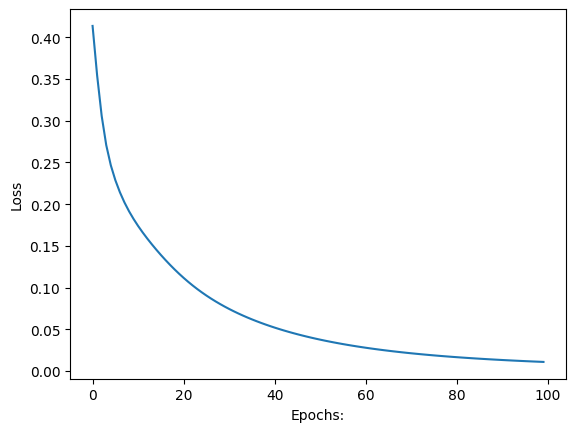

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data for classes A, B, and C
a = [0, 0, 1, 1, 0, 0,
     0, 1, 0, 0, 1, 0,
     1, 1, 1, 1, 1, 1,
     1, 0, 0, 0, 0, 1,
     1, 0, 0, 0, 0, 1]

b = [0, 1, 1, 1, 1, 0,
     0, 1, 0, 0, 1, 0,
     0, 1, 1, 1, 1, 0,
     0, 1, 0, 0, 1, 0,
     0, 1, 1, 1, 1, 0]

c = [0, 1, 1, 1, 1, 0,
     0, 1, 0, 0, 0, 0,
     0, 1, 0, 0, 0, 0,
     0, 1, 0, 0, 0, 0,
     0, 1, 1, 1, 1, 0]

# Define the labels
y = [[1, 0, 0],
     [0, 1, 0],
     [0, 0, 1]]

# Convert Data and labels into numpy arrays
x = [np.array(a).reshape(1, 30), np.array(b).reshape(1, 30), np.array(c).reshape(1, 30)]
y = np.array(y)

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Forward propagation
def f_forward(x, w1, w2):
    # Hidden layer
    z1 = x.dot(w1)
    a1 = sigmoid(z1)
    # Output layer
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    return a2

# Generate random weights
def generate_wt(x, y):
    return np.random.randn(x, y)

# Define loss function
def loss(out, y):
    s = np.square(out - y)
    s = np.sum(s) / len(y)
    return s

# Backpropagation
def back_prop(x, y, w1, w2, alpha):
    z1 = x.dot(w1)
    a1 = sigmoid(z1)
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    d2 = (a2 - y)
    d1 = np.multiply(w2.dot(d2.transpose()).transpose(), (np.multiply(a1, 1 - a1)))
    w1_adj = x.transpose().dot(d1)
    w2_adj = a1.transpose().dot(d2)
    w1 = w1 - (alpha * w1_adj)
    w2 = w2 - (alpha * w2_adj)
    return w1, w2

# Training
def train(x, y, w1, w2, alpha=0.01, epoch=10):
    acc = []
    loss_val = []
    for j in range(epoch):
        l = []
        for i in range(len(x)):
            out = f_forward(x[i], w1, w2)
            l.append(loss(out, y[i]))
            w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
        acc.append((1 - (sum(l) / len(x))) * 100)
        loss_val.append(sum(l) / len(x))
        print("Epochs:", j + 1, "acc:", (1 - (sum(l) / len(x))) * 100)
    return acc, loss_val, w1, w2

# Predict function
def predict(x, w1, w2):
    out = f_forward(x, w1, w2)
    maxm = 0
    k = 0
    for i in range(len(out[0])):
        if maxm < out[0][i]:
            maxm = out[0][i]
            k = i
    if k == 0:
        print("A")
    elif k == 1:
        print("B")
    else:
        print("C")
    plt.imshow(x.reshape(5, 6))
    plt.show()

# Initialize weights
w1 = generate_wt(30, 10)
w2 = generate_wt(10, 3)

# Train the model
acc, loss_val, w1, w2 = train(x, y, w1, w2, 0.1, 100)
import matplotlib.pyplot as plt
plt.plot(loss_val)
plt.ylabel("Loss")
plt.xlabel("Epochs:")
plt.show()

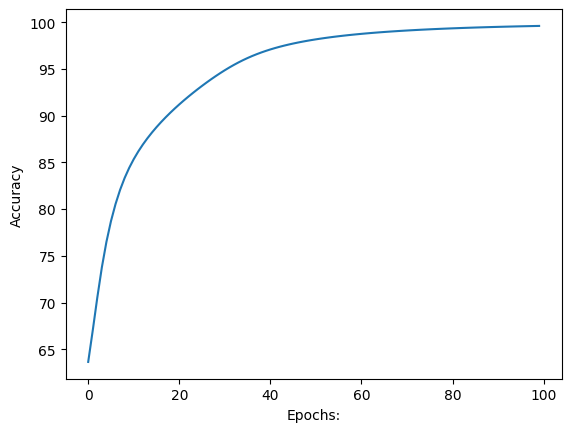

In [ ]:
import matplotlib.pyplot as plt1
plt1.plot(acc)
plt.ylabel("Accuracy")
plt.xlabel("Epochs:")
plt.show()

C


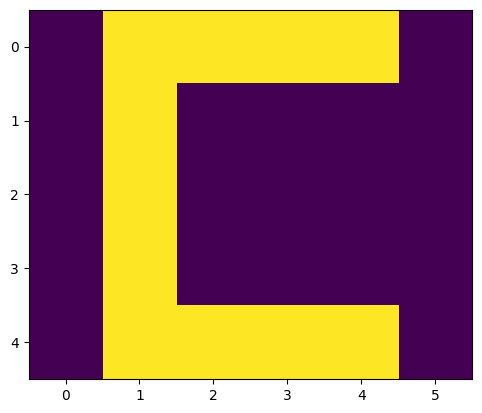

In [ ]:
predict(x[2],w1,w2)